Student Demographic ML Model


Predicting math scores based on student situation and other factors

In [8]:
import pandas as pd  # for dataframes
import numpy as np  # for math
from sklearn.model_selection import train_test_split  # to split data
from sklearn.preprocessing import OneHotEncoder  # to convert text to numbers
from sklearn.compose import ColumnTransformer  # to apply encoding only to certain columns
from sklearn.pipeline import Pipeline  # to combine preprocessing + modeling
from sklearn.linear_model import LinearRegression  # model 1
from sklearn.tree import DecisionTreeRegressor  # model 2
from sklearn.ensemble import RandomForestRegressor  # model 3
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # model evaluation
import matplotlib.pyplot as plt  # visualization
import seaborn as sns  # prettier plots

Reading CSV data into a Dataframe: 

In [10]:
df = pd.read_csv("C:/Users/KIIT0001/Downloads/dataset/StudentsPerformance.csv")#getting the dataset as df

Showing the first 5 rows :

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [48]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Seperating Data into X and Y:

In [14]:
X = df.drop(columns=['math score'])  # features (input)
y = df['math score']  # target (output)

categorical_cols = X.select_dtypes(include='object').columns.tolist()

But we cant feed data directly to our model, so we need to perform PREPROCESSING:

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

Splitting into train and test:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Train Multiple Models & Evaluate:

We define a dictionary of models to try, each one with a different learning strategy:



In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

Now, we need a pipeline to chain: preprocesor and model :

In [26]:
model_results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    model_results[name] = {
        'R2 Score': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }
results_df = pd.DataFrame(model_results).T
results_df

,R2 Score,MAE,MSE,RMSE
Linear Regression,0.880433,4.214763,29.095170,5.393994
Decision Tree,0.731341,6.405000,65.375000,8.085481
Random Forest,0.848848,4.749526,36.781024,6.064736


Sorting by best model:

In [34]:
results_df.sort_values(by='R2 Score', ascending=False)


,R2 Score,MAE,MSE,RMSE
Linear Regression,0.880433,4.214763,29.095170,5.393994
Random Forest,0.848848,4.749526,36.781024,6.064736
Decision Tree,0.731341,6.405000,65.375000,8.085481


Now, we can add graphs and visualization:

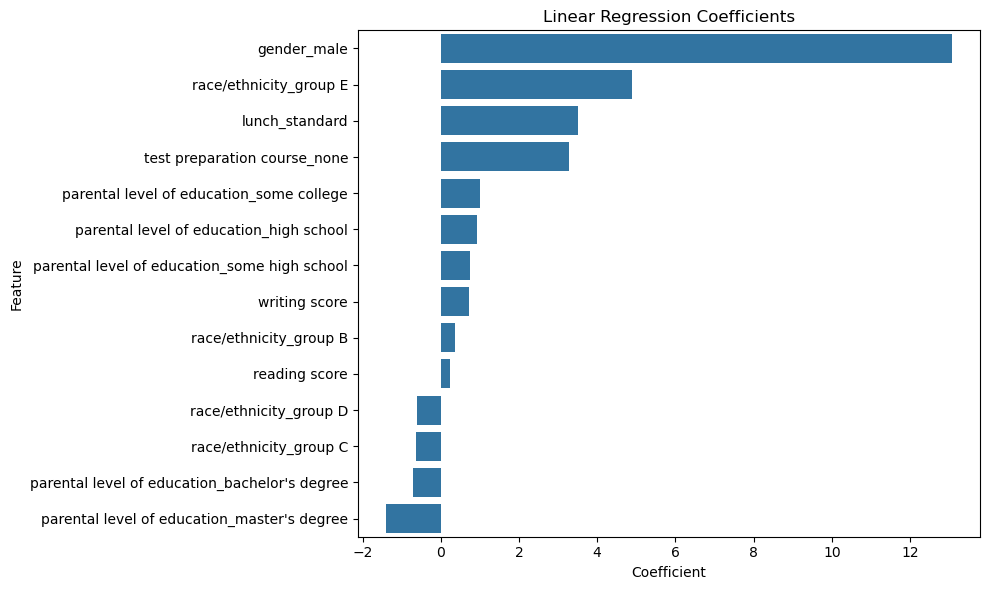

In [37]:
# Define features
categorical_features = categorical_cols
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Access the trained model inside the pipeline
linreg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
linreg_model.fit(X_train, y_train)

# Extract model and coefficients
lr = linreg_model.named_steps['model']
coefficients = lr.coef_
intercept = lr.intercept_

# Get feature names
feature_names = linreg_model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features).tolist()
feature_names += numeric_features  # passthrough columns

# Create coefficient DataFrame
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Linear Regression Coefficients')
plt.tight_layout()
plt.show()

ACTUAL VS PREDICTED VALUES:

In [40]:
y_pred = linreg_model.predict(X_test)
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison_df.head(10)

,Actual,Predicted
0,91,76.387970
1,53,58.885970
2,80,76.990265
3,74,76.851804
4,84,87.627378
5,81,79.014024
6,69,64.654609
7,54,53.007919
8,87,74.184710
9,51,49.213538


IN GRAPH FORMAT: 

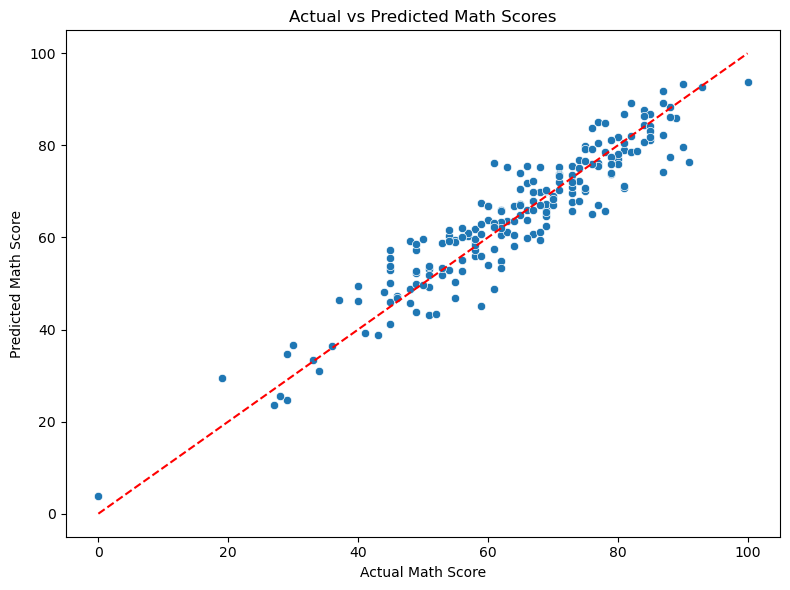

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Scores")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.tight_layout()
plt.show()

RESIDUAL ANALYSIS:

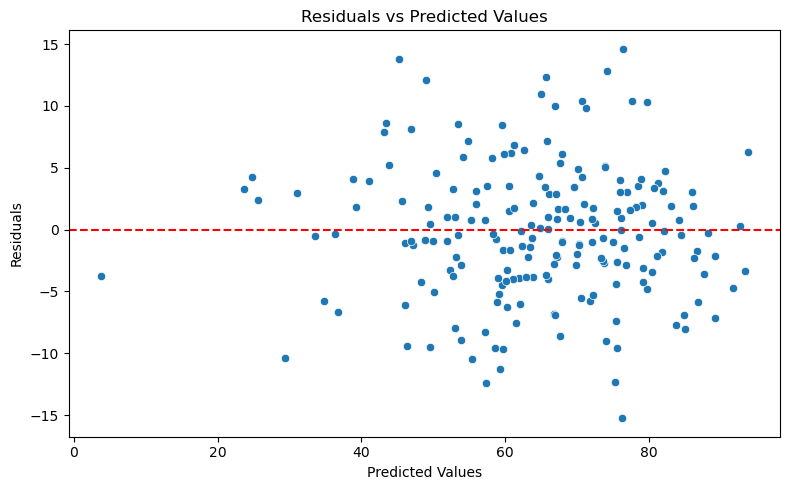

In [46]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.tight_layout()
plt.show()

HEATMAP FOR CORRELATION:

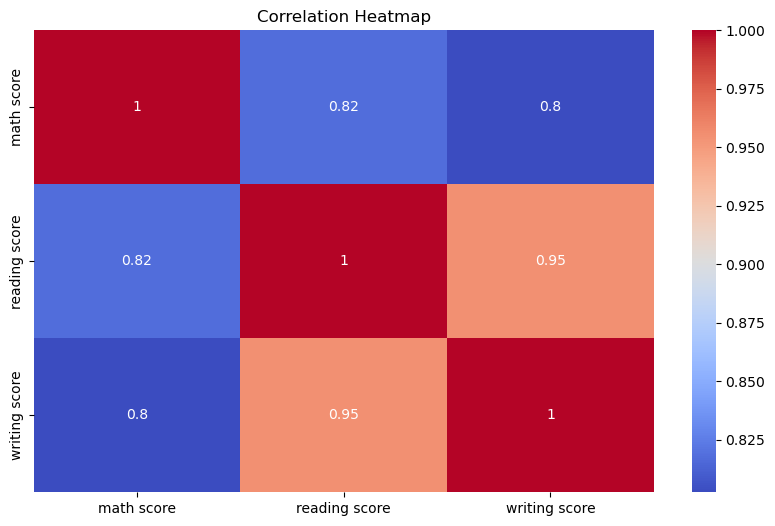

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


BOXPLOT FOR OUTLIER DETECTION:

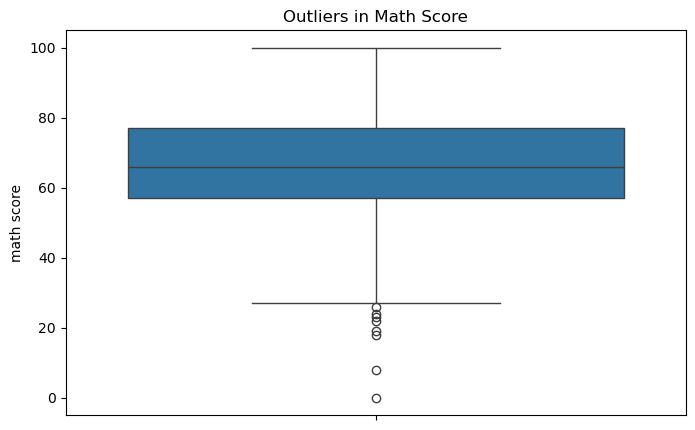

In [56]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df['math score'])
plt.title('Outliers in Math Score')
plt.show()


CROSS VALIDATION:

In [59]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print(f"{name} Average R² Score (CV): {np.mean(scores):.3f}")


Linear Regression Average R² Score (CV): 0.872
Decision Tree Average R² Score (CV): 0.693
Random Forest Average R² Score (CV): 0.836


Hyperparameter Tuning (Random Forest):

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [5, 10, None]
}
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)


Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 100}
Best CV R² Score: 0.8348863569877644


Feature Importance (Random Forest)

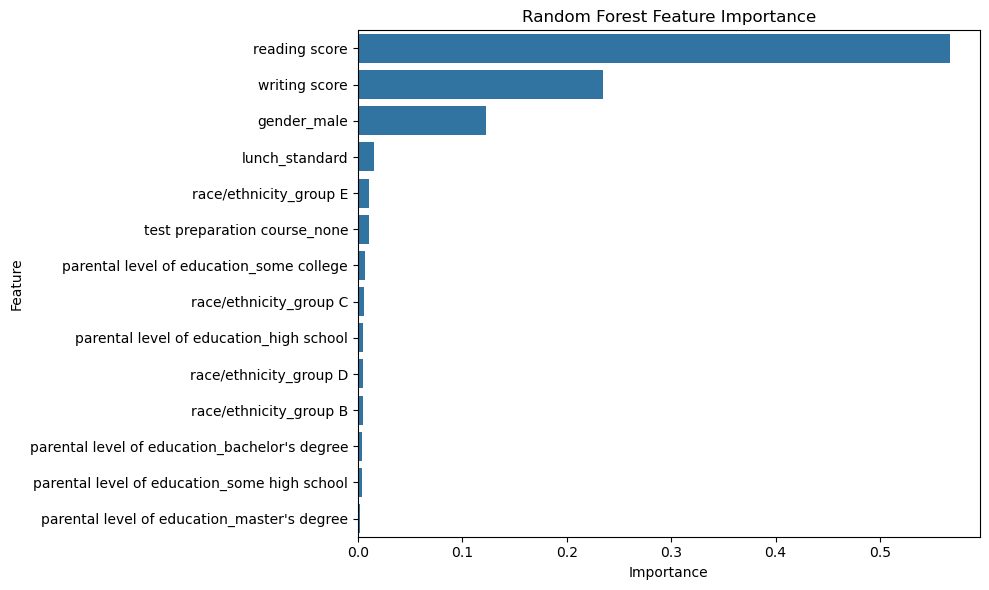

In [65]:
best_model = grid_search.best_estimator_.named_steps['model']
importances = best_model.feature_importances_

feature_names = grid_search.best_estimator_.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols).tolist()
feature_names += numeric_features

import_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
import_df = import_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=import_df)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


SAVING FINAL MODEL:

In [68]:
import joblib
joblib.dump(grid_search.best_estimator_, 'final_model.pkl')


['final_model.pkl']